# Creation of a subsample from the MovieLens 25M dataset

In [2]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

from torch_geometric.data import download_url, extract_zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\kohvk\anaconda3\envs\atm_2022\lib\site-packages\torch_geometric\typing.py:31: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: [WinError 127] The specified procedure could not be found
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
c:\Users\kohvk\anaconda3\envs\atm_2022\lib\site-packages\torch_geometric\typing.py:51: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: [WinError 127] The specified procedure could not be found
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [3]:
# download the 25M dataset if needed
#ml_25m_url = 'https://files.grouplens.org/datasets/movielens/ml-25m.zip'
#extract_zip(download_url(ml_25m_url, '.'), '.')

In [4]:
rating_path = './ml-25m/ratings.csv'
ratings = pd.read_csv(rating_path)

In [5]:
len(ratings)

25000095

In [6]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
# We convert to a readable timestamp
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [7]:
ratings['year'] = ratings['timestamp'].dt.year
#ratings['month'] = ratings['timestamp'].dt.month
ratings.head()

,userId,movieId,rating,timestamp,year
0,1,296,5.0,2006-05-17 15:34:04,2006
1,1,306,3.5,2006-05-17 12:26:57,2006
2,1,307,5.0,2006-05-17 12:27:08,2006
3,1,665,5.0,2006-05-17 15:13:40,2006
4,1,899,3.5,2006-05-17 12:21:50,2006


[Text(0.5, 1.0, 'Number of ratings by year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Num ratings')]

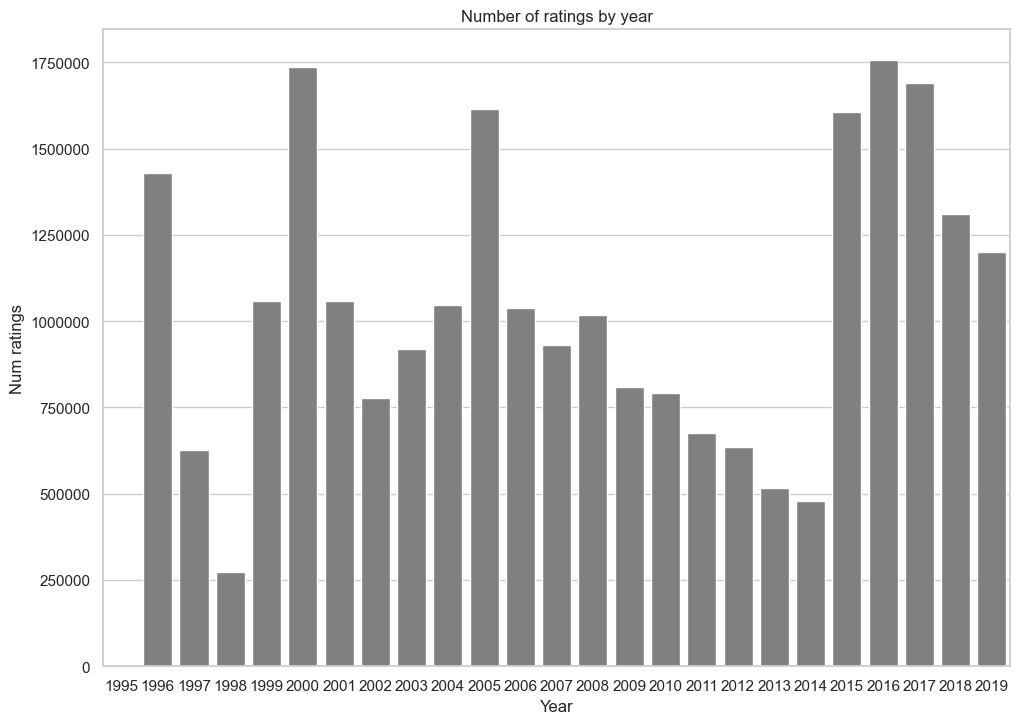

In [8]:
# Plot number of ratings per year
sns.set_theme(style='whitegrid',rc={'axes.formatter.limits': (-8, 9), 'figure.figsize':(11.7,8.27)})
sns.barplot(x=ratings.year.value_counts().index, y=ratings.year.value_counts(), color='gray').set(title='Number of ratings by year', xlabel='Year', ylabel='Num ratings')

In [9]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
year         0
dtype: int64

In [10]:
ratings.duplicated().sum()

0

In [20]:
threshold = 3
print('The positivity threshold is ', threshold)
print(f'The percentage of reviews with a rating at least {threshold}: {round(len(ratings[ratings.rating>=3])/len(ratings)*100,2)}%')
print('These are the ones we keep.')

ratings = ratings[ratings.rating>=3]

The positivity threshold is  3
The percentage of reviews with a rating at least 3: 82.11%
These are the ones we keep.


[Text(0.5, 1.0, 'Number of ratings by year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Num ratings')]

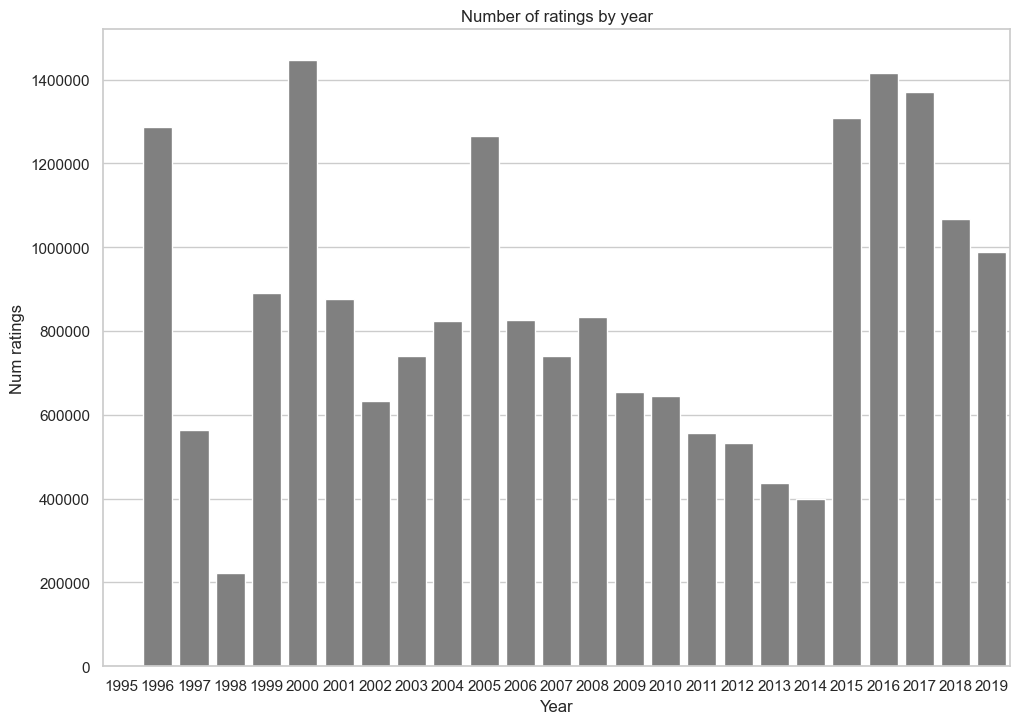

In [21]:
# Plot number of ratings per year after removing reviews under the threshold
sns.set_theme(style='whitegrid',rc={'axes.formatter.limits': (-8, 9), 'figure.figsize':(11.7,8.27)})
sns.barplot(x=ratings.year.value_counts().index, y=ratings.year.value_counts(), color='gray').set(title='Number of ratings by year', xlabel='Year', ylabel='Num ratings')

## Subset 1

Subset 1 contains all ratings from 2018-2019.

In [22]:
ratings_2018_2019 = ratings[ratings['year'] >= 2018].copy() # We take a sample of ratings from years 2018-2019
len(ratings_2018_2019), len(ratings)

(2054576, 20527057)

In [23]:
def print_stats(sample):
    user_counts = sample.userId.value_counts()
    print('Number of ratings in sample: ', len(sample))
    print('Total users in sample: ', len(user_counts))
    print('Users with less than 3 ratings: ', len(user_counts[user_counts < 3]))
    print('Users with less than 5 ratings: ', len(user_counts[user_counts < 5]))
    print('Users with less than 10 ratings: ', len(user_counts[user_counts < 10]))
    print('Users with less than 20 ratings: ', len(user_counts[user_counts < 20]))
    print()
    movie_counts = sample.movieId.value_counts()
    print('Total movies: ', len(movie_counts))
    print('Movies with less than 3 ratings: ', len(movie_counts[movie_counts < 3]))
    print('Movies with less than 5 ratings: ', len(movie_counts[movie_counts < 5]))
    print('Movies with less than 10 ratings: ', len(movie_counts[movie_counts < 10]))
    print('Movies with more than 50 ratings: ', len(movie_counts[movie_counts > 50]))
    
    print()
    print('Minimum number of ratings a user has in this subsample: ', user_counts.min())
    print('Maximum number of ratings a user has in this subsample: ', user_counts.max())
    print('Minimum number of ratings a movie has in this subsample: ', movie_counts.min())
    print('Maximum number of ratings a movie has in this subsample: ', movie_counts.max())


In [24]:
print_stats(ratings_2018_2019)

Number of ratings in sample:  2054576
Total users in sample:  18469
Users with less than 3 ratings:  529
Users with less than 5 ratings:  916
Users with less than 10 ratings:  1698
Users with less than 20 ratings:  3075

Total movies:  42873
Movies with less than 3 ratings:  20907
Movies with less than 5 ratings:  27105
Movies with less than 10 ratings:  32542
Movies with more than 50 ratings:  4214

Minimum number of ratings a user has in this subsample:  1
Maximum number of ratings a user has in this subsample:  8567
Minimum number of ratings a movie has in this subsample:  1
Maximum number of ratings a movie has in this subsample:  7807


In [25]:
ratings_2018_2019.to_csv('./data/1_subsample_2018_2019_nopruning.csv', index=False)

## Subset 2

Subset 2 contains rating from 2018-2019 but users and movies below 10 ratings have been removed.

In [27]:
# Remove users below 10 ratings
user_counts_ratings_2018_2019 = ratings_2018_2019.userId.value_counts()
users_more_than_10_ratings = user_counts_ratings_2018_2019[user_counts_ratings_2018_2019 > 10].index
ratings_2018_2019_pruned = ratings_2018_2019[ratings_2018_2019.userId.isin(users_more_than_10_ratings)]

# Remove movies below 10 ratings
pruned_movie_counts = ratings_2018_2019_pruned.movieId.value_counts()
movies_more_than_10_ratings = pruned_movie_counts[pruned_movie_counts > 10].index
ratings_2018_2019_pruned = ratings_2018_2019_pruned[ratings_2018_2019_pruned.movieId.isin(movies_more_than_10_ratings)]

# Remove users below 10 ratings if there are any because of movie removal
pruned_user_counts = ratings_2018_2019_pruned.userId.value_counts()
users_more_than_10_ratings = pruned_user_counts[pruned_user_counts > 10].index
ratings_2018_2019_pruned = ratings_2018_2019_pruned[ratings_2018_2019_pruned.userId.isin(users_more_than_10_ratings)]

In [28]:
print_stats(ratings_2018_2019_pruned)

Number of ratings in sample:  1955816
Total users in sample:  16625
Users with less than 3 ratings:  0
Users with less than 5 ratings:  0
Users with less than 10 ratings:  0
Users with less than 20 ratings:  1331

Total movies:  9757
Movies with less than 3 ratings:  0
Movies with less than 5 ratings:  0
Movies with less than 10 ratings:  0
Movies with more than 50 ratings:  4206

Minimum number of ratings a user has in this subsample:  11
Maximum number of ratings a user has in this subsample:  2684
Minimum number of ratings a movie has in this subsample:  10
Maximum number of ratings a movie has in this subsample:  7780


In [29]:
ratings_2018_2019_pruned.to_csv('./data/2_subsample_2018_2019_pruned.csv', index=False)

## Subset 3

We take a random subsample of 5000 users from the first subset (all ratings 2018-2019).

In [30]:
userids = ratings_2018_2019.userId.unique()
np.random.seed(0)
sample_5000 = np.random.choice(userids, size=5000, replace=False) # Let's keep random 1000 users
print(f'There are {len(userids)} users active in 2018-2019. We randomly sample {len(sample_5000)} of them.')


There are 18469 users active in 2018-2019. We randomly sample 5000 of them.


In [31]:
subsample_5000 = ratings_2018_2019[ratings_2018_2019.userId.isin(sample_5000)]
print(f'After sampling 5000 random users. We have {len(subsample_5000)} ratings and {len(subsample_5000.movieId.unique())} unique movies.')

After sampling 5000 random users. We have 562187 ratings and 26604 unique movies.


In [36]:
print_stats(subsample_5000)

Number of ratings in sample:  562187
Total users in sample:  5000
Users with less than 3 ratings:  147
Users with less than 5 ratings:  237
Users with less than 10 ratings:  442
Users with less than 20 ratings:  791

Total movies:  26604
Movies with less than 3 ratings:  15788
Movies with less than 5 ratings:  18828
Movies with less than 10 ratings:  21471
Movies with more than 50 ratings:  1918

Minimum number of ratings a user has in this subsample:  1
Maximum number of ratings a user has in this subsample:  5525
Minimum number of ratings a movie has in this subsample:  1
Maximum number of ratings a movie has in this subsample:  2156


In [33]:
subsample_5000.to_csv('./data/3_subsample_2018_2019_5000_users.csv', index=False)

## Subset 4

From the subsample of 5000 users we now remove users with less than 10 ratings and all movies with less than 10 ratings.

In [37]:
# Remove users below 10 ratings
user_counts_ratings_2018_2019_5k = subsample_5000.userId.value_counts()
users_more_than_10_ratings_5k = user_counts_ratings_2018_2019_5k[user_counts_ratings_2018_2019_5k > 10].index
subsample_5000_pruned = subsample_5000[subsample_5000.userId.isin(users_more_than_10_ratings_5k)]

# Remove movies below 10 ratings
pruned_movie_counts = subsample_5000_pruned.movieId.value_counts()
movies_more_than_10_ratings = pruned_movie_counts[pruned_movie_counts > 10].index
subsample_5000_pruned = subsample_5000_pruned[subsample_5000_pruned.movieId.isin(movies_more_than_10_ratings)]

# Remove users below 10 ratings if there are any because of movie removal
pruned_user_counts = subsample_5000_pruned.userId.value_counts()
users_more_than_10_ratings = pruned_user_counts[pruned_user_counts > 10].index
subsample_5000_pruned = subsample_5000_pruned[subsample_5000_pruned.userId.isin(users_more_than_10_ratings)]

In [38]:
print_stats(subsample_5000_pruned)

Number of ratings in sample:  509729
Total users in sample:  4510
Users with less than 3 ratings:  0
Users with less than 5 ratings:  0
Users with less than 10 ratings:  0
Users with less than 20 ratings:  370

Total movies:  4841
Movies with less than 3 ratings:  0
Movies with less than 5 ratings:  0
Movies with less than 10 ratings:  0
Movies with more than 50 ratings:  1912

Minimum number of ratings a user has in this subsample:  11
Maximum number of ratings a user has in this subsample:  1898
Minimum number of ratings a movie has in this subsample:  10
Maximum number of ratings a movie has in this subsample:  2148


In [39]:
subsample_5000_pruned.to_csv('./data/4_subsample_2018_2019_5000_users_pruned.csv', index=False)

## Subset 5

We take a random subsample of 1000 users from the first subset (all ratings 2018-2019).

In [40]:
userids = ratings_2018_2019.userId.unique()
np.random.seed(0)
sample_1000 = np.random.choice(userids, size=1000, replace=False) # Let's keep random 1000 users
print(f'There are {len(userids)} users active in 2018-2019. We randomly sample {len(sample_1000)} of them.')

There are 18469 users active in 2018-2019. We randomly sample 1000 of them.


In [41]:
subsample_1000 = ratings_2018_2019[ratings_2018_2019.userId.isin(sample_1000)]
print(f'After sampling 1000 random users. We have {len(subsample_1000)} ratings and {len(subsample_1000.movieId.unique())} unique movies.')

After sampling 1000 random users. We have 117608 ratings and 11042 unique movies.


In [42]:
print_stats(subsample_1000)

Number of ratings in sample:  117608
Total users in sample:  1000
Users with less than 3 ratings:  32
Users with less than 5 ratings:  59
Users with less than 10 ratings:  98
Users with less than 20 ratings:  163

Total movies:  11042
Movies with less than 3 ratings:  6372
Movies with less than 5 ratings:  7662
Movies with less than 10 ratings:  8927
Movies with more than 50 ratings:  552

Minimum number of ratings a user has in this subsample:  1
Maximum number of ratings a user has in this subsample:  1811
Minimum number of ratings a movie has in this subsample:  1
Maximum number of ratings a movie has in this subsample:  442


In [43]:
subsample_1000.to_csv('./data/5_subsample_2018_2019_1000_users.csv', index=False)

## Subset 6

From the subsample of 1000 users we now remove users with less than 10 ratings and all movies with less than 10 ratings.

In [44]:
# Remove users below 10 ratings
user_counts_ratings_2018_2019_1k = subsample_1000.userId.value_counts()
users_more_than_10_ratings_1k = user_counts_ratings_2018_2019_1k[user_counts_ratings_2018_2019_1k > 10].index
subsample_1000_pruned = subsample_1000[subsample_1000.userId.isin(users_more_than_10_ratings_1k)]

# Remove movies below 10 ratings
pruned_movie_counts = subsample_1000_pruned.movieId.value_counts()
movies_more_than_10_ratings = pruned_movie_counts[pruned_movie_counts > 10].index
subsample_1000_pruned = subsample_1000_pruned[subsample_1000_pruned.movieId.isin(movies_more_than_10_ratings)]

# Remove users below 10 ratings if there are any because of movie removal
pruned_user_counts = subsample_1000_pruned.userId.value_counts()
users_more_than_10_ratings = pruned_user_counts[pruned_user_counts > 10].index
subsample_1000_pruned = subsample_1000_pruned[subsample_1000_pruned.userId.isin(users_more_than_10_ratings)]

In [45]:
print_stats(subsample_1000_pruned)

Number of ratings in sample:  95275
Total users in sample:  884
Users with less than 3 ratings:  0
Users with less than 5 ratings:  0
Users with less than 10 ratings:  0
Users with less than 20 ratings:  93

Total movies:  1994
Movies with less than 3 ratings:  0
Movies with less than 5 ratings:  0
Movies with less than 10 ratings:  0
Movies with more than 50 ratings:  547

Minimum number of ratings a user has in this subsample:  11
Maximum number of ratings a user has in this subsample:  969
Minimum number of ratings a movie has in this subsample:  10
Maximum number of ratings a movie has in this subsample:  441


In [ ]:
subsample_1000_pruned.to_csv('./data/6_subsample_2018_2019_1000_users_pruned.csv', index=False)